## –ú–æ–¥–µ–ª–∏ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –æ–±—ä–µ–º–∞ —É–±–æ—è –ö–†–° –ø–æ –ê–∫–º–æ–ª–∏–Ω—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pylab import rcParams
from IPython.display import display
import math
from prophet import Prophet
pd.set_option('display.max_columns', 130)


import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter("ignore", category=InterpolationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)



### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ EDA

In [344]:
df = pd.read_excel("–î–∞—Ç–∞—Å–µ—Ç –ø–æ –ö–†–°.xlsx")
df.head(5)

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-01  4455.35     9.8        372560.0   -12.490323
1  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-02  3654.20     9.8        399442.0   -10.192857
2  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-03  4287.08     8.3        425605.0    -5.870968
3  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-04  3923.21     8.8        440023.0     4.490000
4  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-05  3849.70    42.8        444647.0    14.574194

In [345]:
df_akmola = df[df['–†–µ–≥–∏–æ–Ω'] == '–ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨']
df_akmola.head()

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥      –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞
0  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-01  4455.35     9.8        372560.0   -12.490323
1  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-02  3654.20     9.8        399442.0   -10.192857
2  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-03  4287.08     8.3        425605.0    -5.870968
3  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-04  3923.21     8.8        440023.0     4.490000
4  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-05  3849.70    42.8        444647.0    14.574194

In [346]:
df_akmola = df_akmola.rename(columns={'–ö–†–°': '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°'})
df_akmola.head()

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  \
0  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-01          4455.35     9.8        372560.0   
1  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-02          3654.20     9.8        399442.0   
2  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-03          4287.08     8.3        425605.0   
3  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-04          3923.21     8.8        440023.0   
4  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-05          3849.70    42.8        444647.0   

   –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  
0   -12.490323  
1   -10.192857  
2    -5.870968  
3     4.490000  
4    14.574194

In [347]:
df_akmola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   –†–µ–≥–∏–æ–Ω           120 non-null    object 
 1   –ü–µ—Ä–∏–æ–¥           120 non-null    object 
 2   –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  120 non-null    float64
 3   –û—Å–∞–¥–∫–∏           120 non-null    float64
 4   –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°   120 non-null    float64
 5   –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞      120 non-null    float64
dtypes: float64(4), object(2)
memory usage: 6.6+ KB


In [348]:
df_akmola.isna().sum()

–†–µ–≥–∏–æ–Ω             0
–ü–µ—Ä–∏–æ–¥             0
–û–±—ä–µ–º —É–±–æ—è: –ö–†–°    0
–û—Å–∞–¥–∫–∏             0
–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°     0
–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞        0
dtype: int64

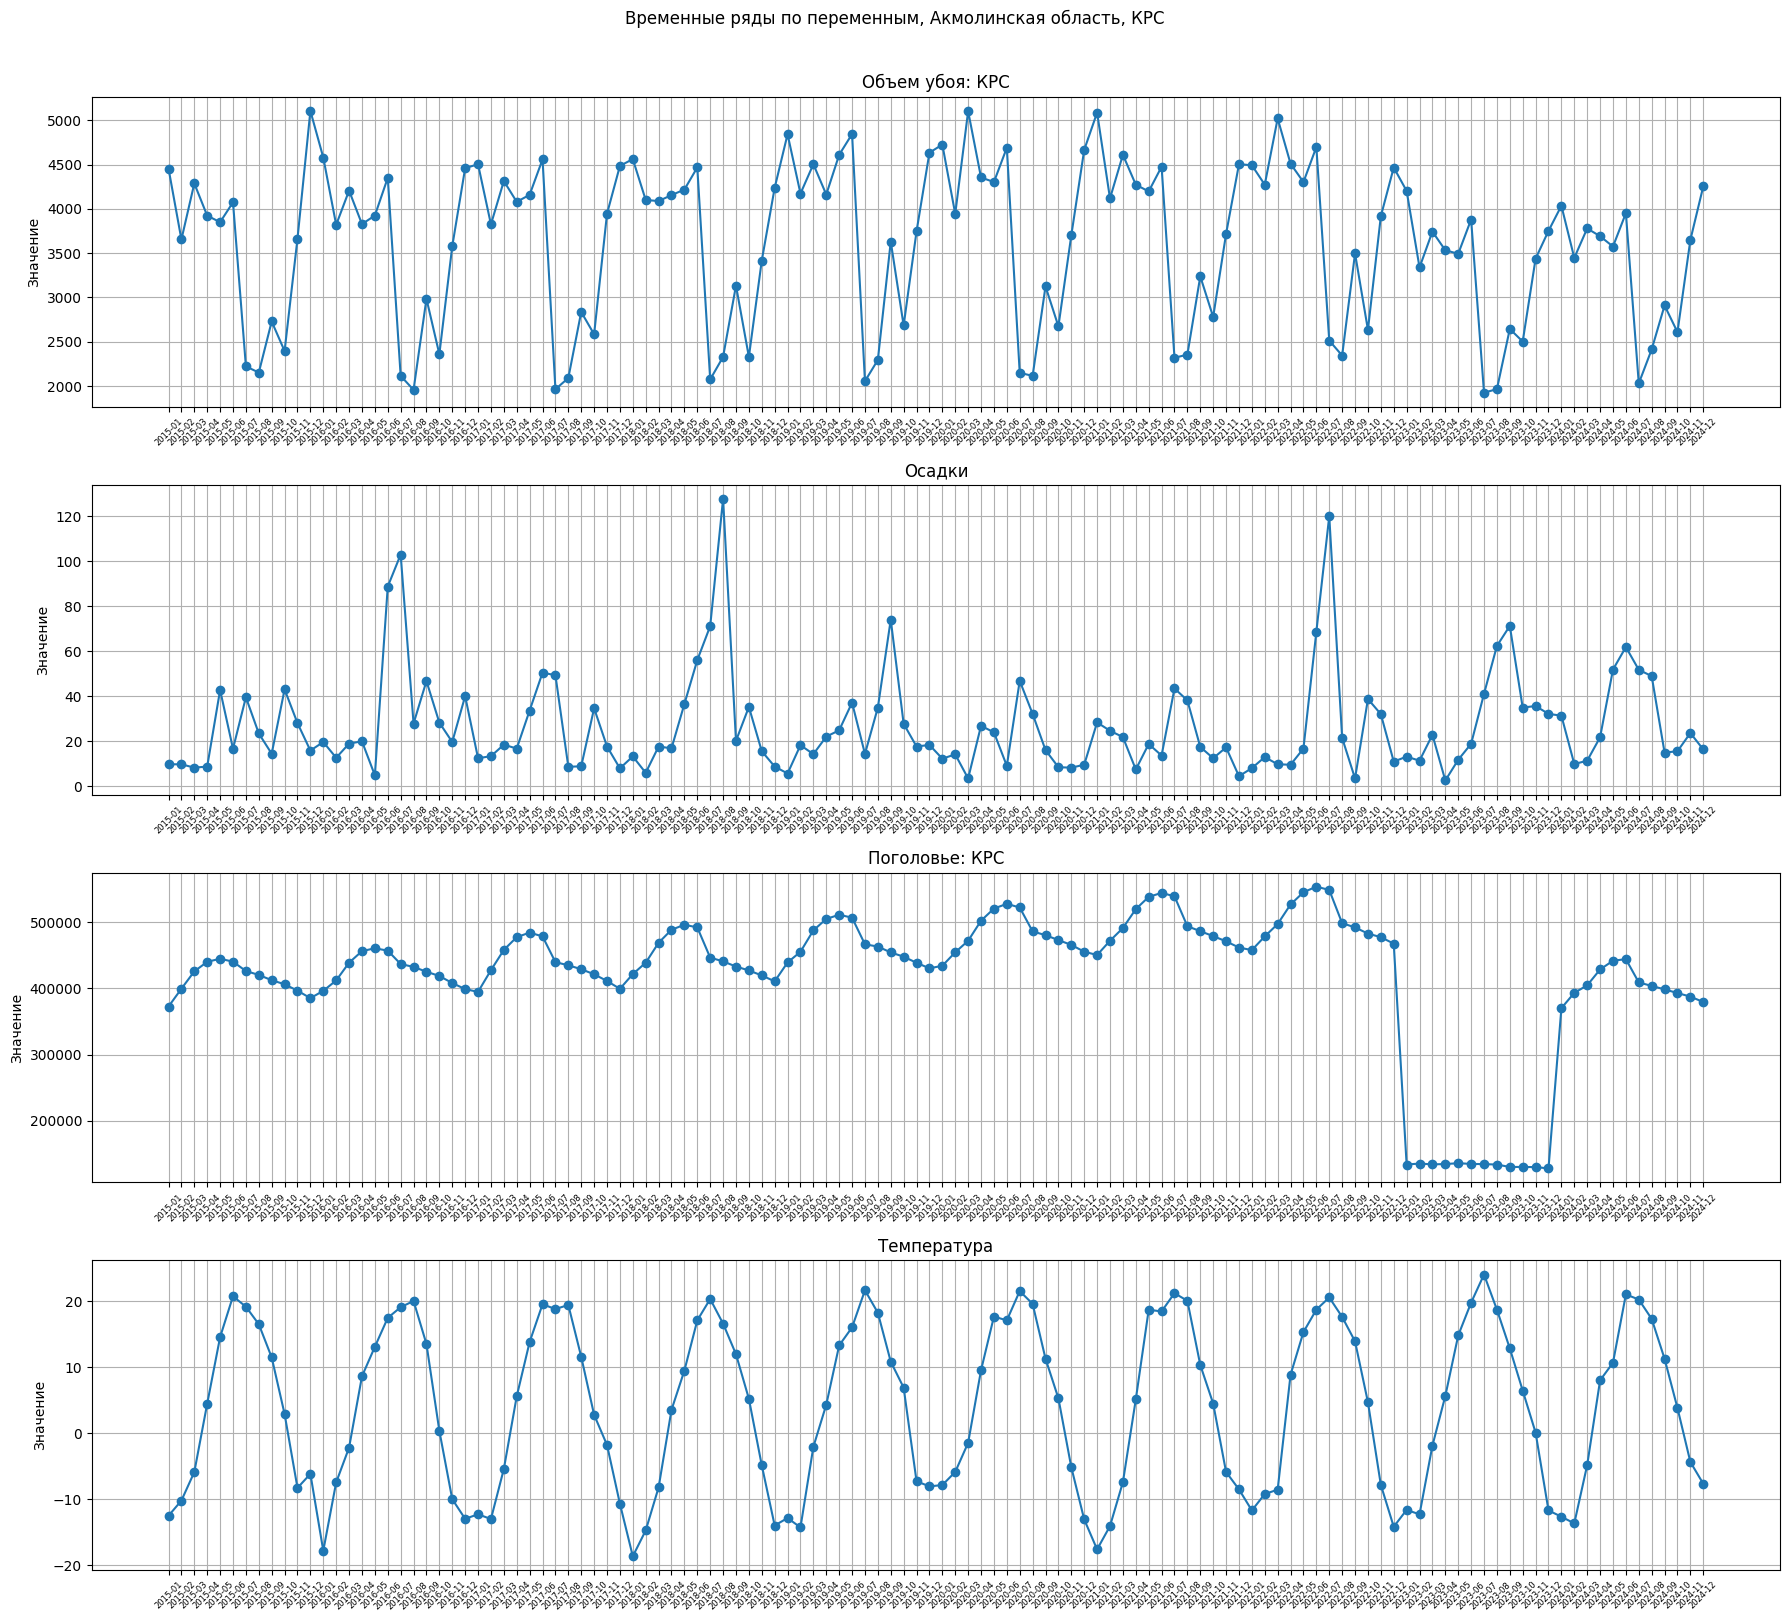

In [349]:
# Plot each variable in its own subplot
value_cols = [col for col in df_akmola.columns if col not in ["–ü–µ—Ä–∏–æ–¥", "–†–µ–≥–∏–æ–Ω"]]

n = len(value_cols)
plt.figure(figsize=(18, 4 * n))

for i, col in enumerate(value_cols, 1):
    plt.subplot(n, 1, i)
    plt.plot(df_akmola["–ü–µ—Ä–∏–æ–¥"], df_akmola[col], marker="o")
    plt.title(f"{col}")
    plt.grid(True)
    plt.ylabel("–ó–Ω–∞—á–µ–Ω–∏–µ")
    plt.xticks(rotation=45, fontsize = 6)

plt.suptitle("–í—Ä–µ–º–µ–Ω–Ω—ã–µ —Ä—è–¥—ã –ø–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", y=1.01)
plt.tight_layout()
plt.show()


In [350]:
# Create lags (t-6 to t+6) for the target variable
for lag in range(-6, 7):
    if lag < 0:
        df_akmola[f"–ö–†–°_t+{abs(lag)}"] = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].shift(lag)  # lead
    elif lag > 0:
        df_akmola[f"–ö–†–°_t-{lag}"] = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].shift(lag)

# Drop NA rows caused by shifting
df_akmola_lag = df_akmola.dropna().copy()
df_akmola_lag = df_akmola_lag[['–†–µ–≥–∏–æ–Ω', '–ü–µ—Ä–∏–æ–¥', '–û—Å–∞–¥–∫–∏', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°',
       '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–ö–†–°_t-6', '–ö–†–°_t-5', '–ö–†–°_t-4', '–ö–†–°_t-3', '–ö–†–°_t-2',
       '–ö–†–°_t-1', '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°', '–ö–†–°_t+1', '–ö–†–°_t+2', '–ö–†–°_t+3', '–ö–†–°_t+4', '–ö–†–°_t+5', '–ö–†–°_t+6']]
df_akmola_lag


–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  \
6    –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-07    39.6        426134.0    19.180645   
7    –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-08    23.5        420244.0    16.529032   
8    –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-09    14.5        412301.0    11.496667   
9    –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-10    43.1        406176.0     2.925806   
10   –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-11    28.1        396512.0    -8.270000   
..                   ...      ...     ...             ...          ...   
109  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-02     9.9        393245.0   -13.644828   
110  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-03    11.4        404506.0    -4.809677   
111  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-04    21.8        428509.0     8.026667   
112  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-05    51.9        441647.0    10.696774   
113  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-06    61.9        444063.0    21.043333   

     –ö–†–°_t-6  –ö–†–°_t-5  –ö–†–°_t-4  –ö–†–°_t-3  –ö–†–°_t-2  –ö–†–°_t-1  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  \
6    4455.35  3654.20  4287.08  3923.21  3849.70  4074.13          2221.96   
7    3654.20  4287.08  3923.21  3849.70  4074.13  2221.96          2151.76   
8    4287.08  3923.21  3849.70  4074.13  2221.96  2151.76          2728.61   
9    3923.21  3849.70  4074.13  2221.96  2151.76  2728.61          2395.25   
10   3849.70  4074.13  2221.96  2151.76  2728.61  2395.25          3662.75   
..       ...      ...      ...      ...      ...      ...              ...   
109  1964.12  2644.50  2501.99  3437.92  3751.14  4035.37          3446.55   
110  2644.50  2501.99  3437.92  3751.14  4035.37  3446.55          3779.21   
111  2501.99  3437.92  3751.14  4035.37  3446.55  3779.21          3691.05   
112  3437.92  3751.14  4035.37  3446.55  3779.21  3691.05          3574.86   
113  3751.14  4035.37  3446.55  3779.21  3691.05  3574.86          3951.41   

     –ö–†–°_t+1  –ö–†–°_t+2  –ö–†–°_t+3  –ö–†–°_t+4  –ö–†–°_t+5  –ö–†–°_t+6  
6    2151.76  2728.61  2395.25  3662.75  5106.13  4579.64  
7    2728.61  2395.25  3662.75  5106.13  4579.64  3819.89  
8    2395.25  3662.75  5106.13  4579.64  3819.89  4206.27  
9    3662.75  5106.13  4579.64  3819.89  4206.27  3828.08  
10   5106.13  4579.64  3819.89  4206.27  3828.08  3924.54  
..       ...      ...      ...      ...      ...      ...  
109  3779.21  3691.05  3574.86  3951.41  2029.47  2412.70  
110  3691.05  3574.86  3951.41  2029.47  2412.70  2909.66  
111  3574.86  3951.41  2029.47  2412.70  2909.66  2608.27  
112  3951.41  2029.47  2412.70  2909.66  2608.27  3649.19  
113  2029.47  2412.70  2909.66  2608.27  3649.19  4253.58  

[108 rows x 18 columns]

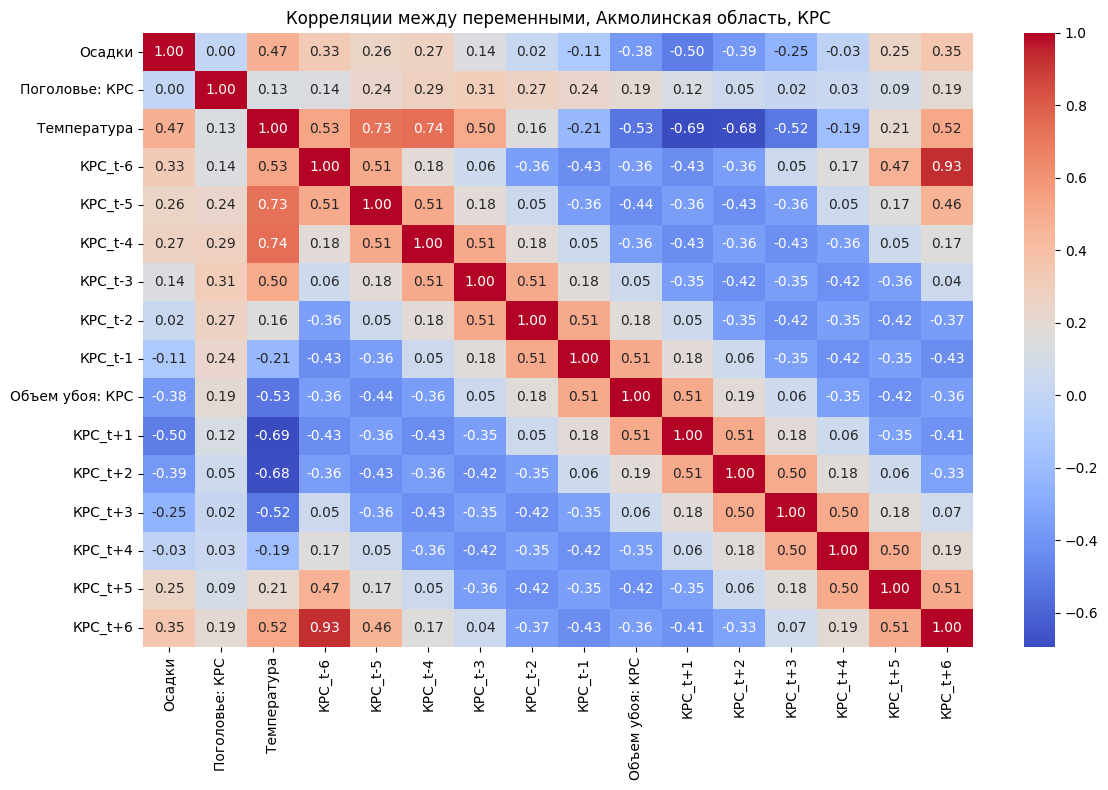

In [351]:
df_corr = df_akmola_lag[[col for col in df_akmola_lag.columns if col not in ["–†–µ–≥–∏–æ–Ω", "–ü–µ—Ä–∏–æ–¥"]]].dropna()

# 1. Correlation matrix
corr_matrix = df_corr.corr()

# 2. Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°")
plt.tight_layout()
plt.show()

* –°–∏–ª—å–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.93) –º–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è —Å –ª–∞–≥–æ–º –≤ +6 –∏ -6 –º–µ—Å—è—Ü–µ–≤, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ (–≥–æ–¥–æ–≤–æ–π) —Å–µ–∑–æ–Ω–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä –¥–∏–Ω–∞–º–∏–∫–∏ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è;
* –£–º–µ—Ä–µ–Ω–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (~0.50) –º–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∑–∞ –≤—Å–µ —Å–æ—Å–µ–¥—Å—Ç–≤—É—é—â–∏–µ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø–µ—Ä–∏–æ–¥—ã: –º–µ–∂–¥—É t0 –∏ t+1, t0 –∏ t-1, t+3 –∏ t+2, t+3 –∏ t+4 –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ. –≠—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –Ω–∞–ª–∏—á–∏–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö: –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –≤ —Ç–µ–∫—É—â–µ–º –º–µ—Å—è—Ü–µ —á–∞—Å—Ç–∏—á–Ω–æ –æ–±—ä—è—Å–Ω—è—é—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤ —Å–æ—Å–µ–¥–Ω–∏—Ö –º–µ—Å—è—Ü–∞—Ö. –≠—Ç–æ —Ç–∏–ø–∏—á–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –∞–≥—Ä–∞—Ä–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–µ, –≥–¥–µ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–æ—Ü–µ—Å—Å—ã –∏–º–µ—é—Ç –∏–Ω–µ—Ä—Ü–∏–æ–Ω–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä. –≠—Ç–æ —Ç–∞–∫–∂–µ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –º–æ–¥–µ–ª–∏ –∞–≤—Ç–æ—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (AR, ARIMA, SARIMA) –º–æ–≥—É—Ç —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–∞ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö, —Ç–∞–∫ –∫–∞–∫ —Ç–µ–∫—É—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è "–ø–æ—Ö–æ–∂–∏" –Ω–∞ –Ω–µ–¥–∞–≤–Ω–∏–µ.
* –ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ –∏ —Å–æ—Å–µ–¥—Å—Ç–≤—É—é—â–∏—Ö –º–µ—Å—è—Ü–µ–≤ –æ—Å–ª–∞–±–µ–≤–∞–µ—Ç –ø–æ—Å–ª–µ 3-—Ö –º–µ—Å—è—Ü–µ–≤, —á—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–ª–µ–¥—Å—Ç–≤–∏–µ–º –µ–∂–µ–∫–≤–∞—Ä—Ç–∞–ª—å–Ω–æ–π —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç–∏ –ø–æ –ø—Ä–æ–¥—É–∫—Ü–∏–∏ –ö–§–• –∏ –Ω–∞—Å–µ–ª–µ–Ω–∏—è (–±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ) –∏ –≤–æ–∑–º–æ–∂–Ω–æ–π –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –º–µ—Å—è—Ü—ã.
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –≤ —Ç–µ–∫—É—â–µ–º –∏ —Å–æ—Å–µ–¥—Å—Ç–≤—É—é—â–∏—Ö –º–µ—Å—è—Ü–∞—Ö –∑–∞–º–µ—Ç–Ω–æ –æ—Å–ª–∞–±–µ–≤–∞–µ—Ç –ø–æ—Å–ª–µ –ª–∞–≥–æ–≤ ¬±3 –º–µ—Å—è—Ü–µ–≤. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –æ—Å–Ω–æ–≤–Ω–æ–π –æ–±—ä—ë–º –¥–∞–Ω–Ω—ã—Ö —Ñ–æ—Ä–º–∏—Ä—É–µ—Ç—Å—è –∑–∞ —Å—á—ë—Ç –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç–∏ –∫—Ä–µ—Å—Ç—å—è–Ω—Å–∫–∏—Ö/—Ñ–µ—Ä–º–µ—Ä—Å–∫–∏—Ö —Ö–æ–∑—è–π—Å—Ç–≤ –∏ —Ö–æ–∑—è–π—Å—Ç–≤ –Ω–∞—Å–µ–ª–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ —Å–¥–∞—é—Ç –æ—Ç—á–µ—Ç–Ω–æ—Å—Ç—å –µ–∂–µ–∫–≤–∞—Ä—Ç–∞–ª—å–Ω–æ. –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ, –º–µ—Å—è—á–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–≥—É—Ç –±—ã—Ç—å –ø–æ–ª—É—á–µ–Ω—ã –ø—É—Ç—ë–º –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏–∏ –∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π, —á—Ç–æ —Å–≥–ª–∞–∂–∏–≤–∞–µ—Ç –≤–Ω—É—Ç—Ä–∏–∫–≤–∞—Ä—Ç–∞–ª—å–Ω—ã–µ —Ä–∞–∑–ª–∏—á–∏—è, –Ω–æ —Å–Ω–∏–∂–∞–µ—Ç —Å–≤—è–∑—å –º–µ–∂–¥—É –∫–≤–∞—Ä—Ç–∞–ª–∞–º–∏.
* –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞ –∏ –æ—Å–∞–¥–∫–∏ —É–º–µ—Ä–µ–Ω–Ω–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±–µ–º–∞ —É–±–æ—è —Å –ª–∞–≥–æ–º –¥–æ 3-—Ö –º–µ—Å—è—Ü–µ–≤ (—Å –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω—ã–º —Å–Ω–∏–∂–µ–Ω–∏–µ–º —Å–∏–ª—ã –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∏). 
* –ú–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∏ –ø–æ–≥–æ–ª–æ–≤—å—è –≤ —Ä–∞–º–∫–∞—Ö —Ç–µ–∫—É—â–µ–≥–æ –∏ —Å–ª–µ–¥—É—é—â–µ–≥–æ –º–µ—Å—è—Ü–∞ –æ—Ç–º–µ—á–∞–µ—Ç—Å—è –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (0.19 –∏ 0.12). –ü—Ä–∏ —ç—Ç–æ–º —É—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∞ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ-—É–º–µ—Ä–µ–Ω–Ω–∞—è –ø–æ–∑–∏—Ç–∏–≤–Ω–∞—è –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å (0.20-0.30) –º–µ–∂–¥—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –∑–∞ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ –º–µ—Å—è—Ü—ã (–¥–æ 5 –º–µ—Å—è—Ü–µ–≤ –Ω–∞–∑–∞–¥) –∏ –ø–æ–≥–æ–ª–æ–≤—å—è. 

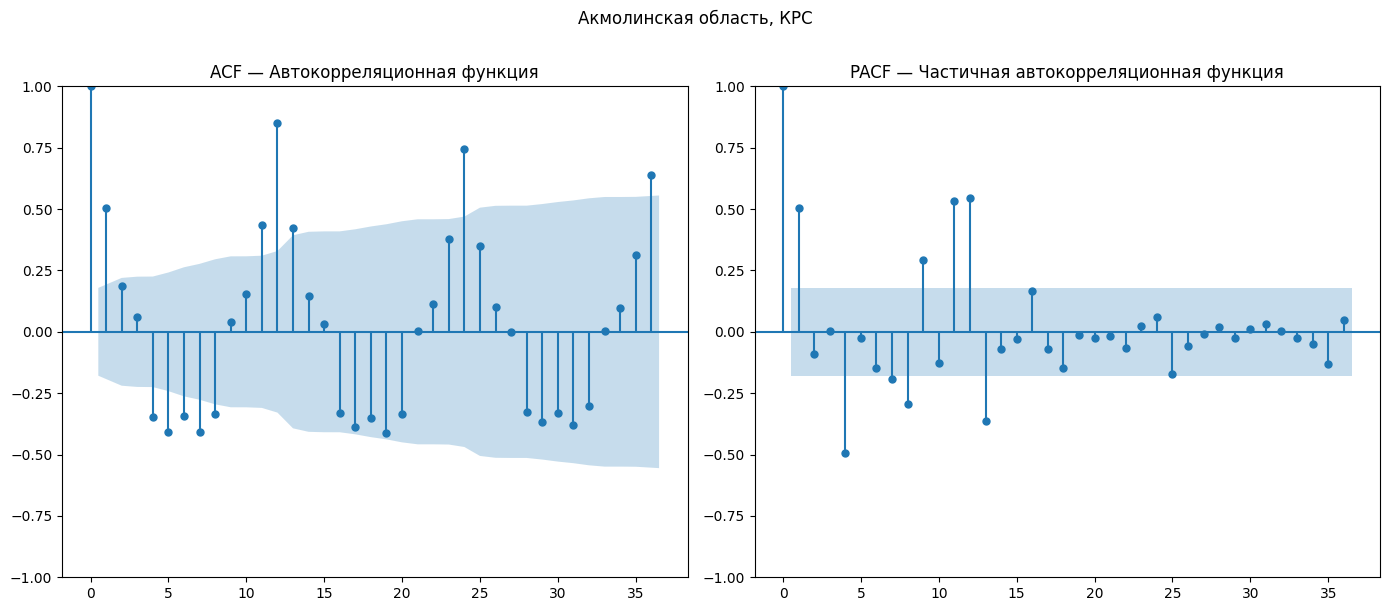

In [352]:
y = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"].sort_index()

# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_acf(y, lags=36, ax=plt.gca(), title="ACF ‚Äî –ê–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è")

plt.subplot(1, 2, 2)
plot_pacf(y, lags=36, ax=plt.gca(), title="PACF ‚Äî –ß–∞—Å—Ç–∏—á–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è", method="ywm")
plt.suptitle("–ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", y=1.01)

plt.tight_layout()
plt.show()

–ì—Ä–∞—Ñ–∏–∫–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –∏ —á–∞—Å—Ç–∏—á–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–π —Ç–∞–∫–∂–µ —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **—Å–∏–ª—å–Ω—É—é –≤–∑–∞–∏–º–æ—Å–≤—è–∑—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —Ç–µ–∫—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞ —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –º–µ—Å—è—Ü–∞** –∏ –Ω–∞ –≤–æ–∑–º–æ–∂–Ω—É—é **–≥–æ–¥–æ–≤—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å** (–ø–∏–∫–∏ –Ω–∞ +12, +24 –∏ +36 –º–µ—Å—è—Ü–µ–≤). 

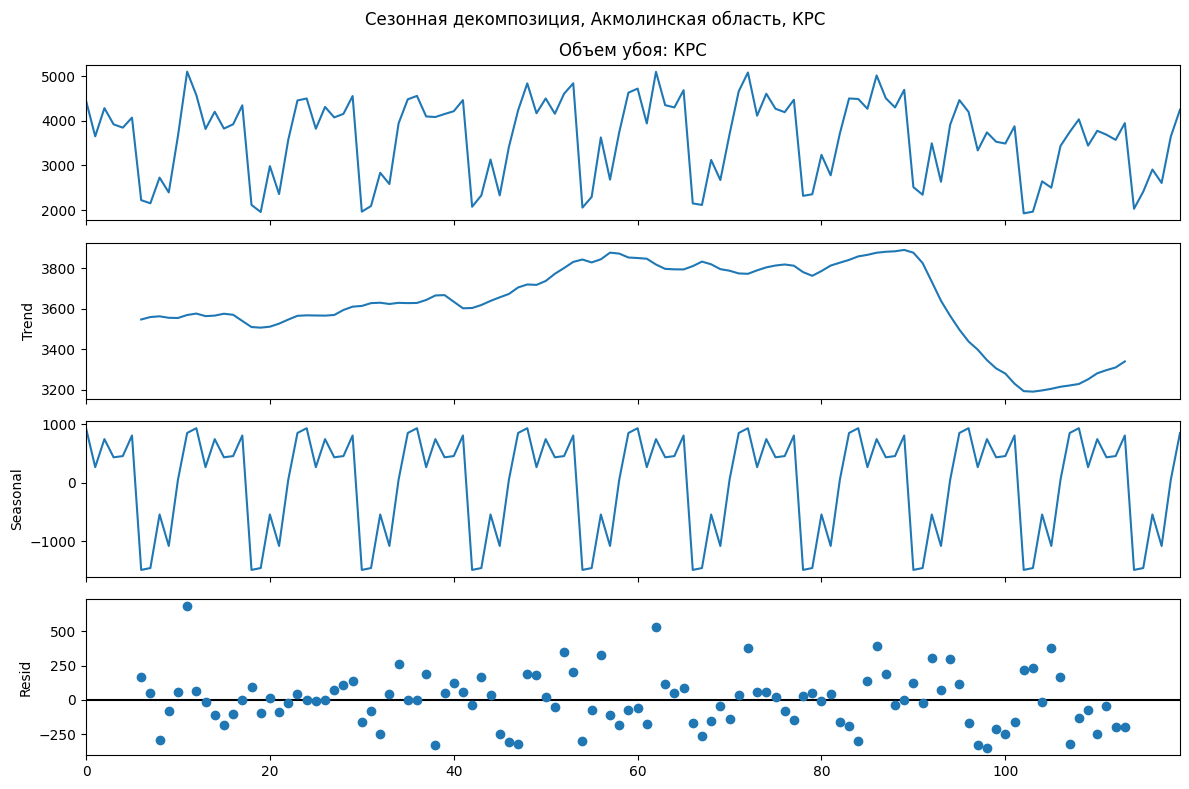

In [353]:
# Perform decomposition (period=12 for monthly data)
decomposition = seasonal_decompose(df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"], model="additive", period=12)

# Plot with larger figure size
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("–°–µ–∑–æ–Ω–Ω–∞—è –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—è, –ê–∫–º–æ–ª–∏–Ω—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –ö–†–°", fontsize=12)
plt.tight_layout()
plt.show()


In [354]:
# Run ADF test
result = adfuller(df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"])

# Display results
print("üìä Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
for key, value in result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")

# Interpretation
if result[1] < 0.05:
    print("‚úÖ The series is likely **stationary** (reject H‚ÇÄ).")
else:
    print("‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).")


üìä Augmented Dickey-Fuller Test Results:
ADF Statistic: -1.2365
p-value: 0.6577
Critical Value (1%): -3.4930
Critical Value (5%): -2.8890
Critical Value (10%): -2.5814
‚ùå The series is likely **non-stationary** (fail to reject H‚ÇÄ).


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ ADF —É–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞ **–Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ—Å—Ç—å** –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞.

### Models

#### –ú—É–ª—å—Ç–∏—Ñ–∞–∫—Ç–æ—Ä–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [355]:
df_akmola

–†–µ–≥–∏–æ–Ω   –ü–µ—Ä–∏–æ–¥  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –û—Å–∞–¥–∫–∏  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  \
0    –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-01          4455.35     9.8        372560.0   
1    –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-02          3654.20     9.8        399442.0   
2    –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-03          4287.08     8.3        425605.0   
3    –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-04          3923.21     8.8        440023.0   
4    –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2015-05          3849.70    42.8        444647.0   
..                   ...      ...              ...     ...             ...   
115  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-08          2412.70    49.0        403674.0   
116  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-09          2909.66    15.0        398450.0   
117  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-10          2608.27    15.6        392916.0   
118  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-11          3649.19    23.7        387565.0   
119  –ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨  2024-12          4253.58    16.4        379385.0   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –ö–†–°_t+6  –ö–†–°_t+5  –ö–†–°_t+4  –ö–†–°_t+3  –ö–†–°_t+2  –ö–†–°_t+1  \
0     -12.490323  2221.96  4074.13  3849.70  3923.21  4287.08  3654.20   
1     -10.192857  2151.76  2221.96  4074.13  3849.70  3923.21  4287.08   
2      -5.870968  2728.61  2151.76  2221.96  4074.13  3849.70  3923.21   
3       4.490000  2395.25  2728.61  2151.76  2221.96  4074.13  3849.70   
4      14.574194  3662.75  2395.25  2728.61  2151.76  2221.96  4074.13   
..           ...      ...      ...      ...      ...      ...      ...   
115    17.338710      NaN      NaN  4253.58  3649.19  2608.27  2909.66   
116    11.300000      NaN      NaN      NaN  4253.58  3649.19  2608.27   
117     3.832258      NaN      NaN      NaN      NaN  4253.58  3649.19   
118    -4.343333      NaN      NaN      NaN      NaN      NaN  4253.58   
119    -7.638710      NaN      NaN      NaN      NaN      NaN      NaN   

     –ö–†–°_t-1  –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  –ö–†–°_t-5  –ö–†–°_t-6  
0        NaN      NaN      NaN      NaN      NaN      NaN  
1    4455.35      NaN      NaN      NaN      NaN      NaN  
2    3654.20  4455.35      NaN      NaN      NaN      NaN  
3    4287.08  3654.20  4455.35      NaN      NaN      NaN  
4    3923.21  4287.08  3654.20  4455.35      NaN      NaN  
..       ...      ...      ...      ...      ...      ...  
115  2029.47  3951.41  3574.86  3691.05  3779.21  3446.55  
116  2412.70  2029.47  3951.41  3574.86  3691.05  3779.21  
117  2909.66  2412.70  2029.47  3951.41  3574.86  3691.05  
118  2608.27  2909.66  2412.70  2029.47  3951.41  3574.86  
119  3649.19  2608.27  2909.66  2412.70  2029.47  3951.41  

[120 rows x 18 columns]

In [356]:
df_vif = df_akmola[[col for col in df_akmola.columns if col not in ["–†–µ–≥–∏–æ–Ω", "–ü–µ—Ä–∏–æ–¥"]]].dropna()

X_vif = add_constant(df_vif[[i for i in df_vif.columns if i != "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data

Variable         VIF
0            const  653.417096
1           –û—Å–∞–¥–∫–∏    1.559632
2   –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°    2.846363
3      –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞   15.053594
4          –ö–†–°_t+6    9.531878
5          –ö–†–°_t+5    4.171034
6          –ö–†–°_t+4    2.667847
7          –ö–†–°_t+3    4.524660
8          –ö–†–°_t+2    3.372869
9          –ö–†–°_t+1    4.400648
10         –ö–†–°_t-1    3.710058
11         –ö–†–°_t-2    3.746488
12         –ö–†–°_t-3    4.232776
13         –ö–†–°_t-4    4.743597
14         –ö–†–°_t-5    5.066881
15         –ö–†–°_t-6    8.591529

–í —Å–≤—è–∑–∏ —Å –≤—ã—Å–æ–∫–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏ –∏—Å–∫–ª—é—á–∞–µ–º t-5 –∏ t-6, –∞ —Ç–∞–∫–∂–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –æ–±—ä–µ–º–∞ —É–±–æ—è –≤ –±—É–¥—É—â–µ–º (t+1..t+6).

In [357]:
# Create lags t-1 to t-3 for –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞, –û—Å–∞–¥–∫–∏, and –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°
for lag in range(1, 4):
    df_akmola[f"–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-{lag}"] = df_akmola["–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞"].shift(lag)
    df_akmola[f"–û—Å–∞–¥–∫–∏_t-{lag}"] = df_akmola["–û—Å–∞–¥–∫–∏"].shift(lag)
    df_akmola[f"–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-{lag}"] = df_akmola["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"].shift(lag)

# Drop rows with NaNs introduced by shifting
# df_akmola_lag = df_akmola.dropna().copy()

# Select relevant columns
df_akmola = df_akmola[[
    '–ü–µ—Ä–∏–æ–¥', '–û—Å–∞–¥–∫–∏', '–û—Å–∞–¥–∫–∏_t-3', '–û—Å–∞–¥–∫–∏_t-2', '–û—Å–∞–¥–∫–∏_t-1',
    '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1',
    '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1',
    '–ö–†–°_t-4', '–ö–†–°_t-3', '–ö–†–°_t-2', '–ö–†–°_t-1', '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°'
]]

df_akmola

–ü–µ—Ä–∏–æ–¥  –û—Å–∞–¥–∫–∏  –û—Å–∞–¥–∫–∏_t-3  –û—Å–∞–¥–∫–∏_t-2  –û—Å–∞–¥–∫–∏_t-1  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  \
0    2015-01     9.8         NaN         NaN         NaN   -12.490323   
1    2015-02     9.8         NaN         NaN         9.8   -10.192857   
2    2015-03     8.3         NaN         9.8         9.8    -5.870968   
3    2015-04     8.8         9.8         9.8         8.3     4.490000   
4    2015-05    42.8         9.8         8.3         8.8    14.574194   
..       ...     ...         ...         ...         ...          ...   
115  2024-08    49.0        51.9        61.9        51.8    17.338710   
116  2024-09    15.0        61.9        51.8        49.0    11.300000   
117  2024-10    15.6        51.8        49.0        15.0     3.832258   
118  2024-11    23.7        49.0        15.0        15.6    -4.343333   
119  2024-12    16.4        15.0        15.6        23.7    -7.638710   

     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  \
0                NaN              NaN              NaN        372560.0   
1                NaN              NaN       -12.490323        399442.0   
2                NaN       -12.490323       -10.192857        425605.0   
3         -12.490323       -10.192857        -5.870968        440023.0   
4         -10.192857        -5.870968         4.490000        444647.0   
..               ...              ...              ...             ...   
115        10.696774        21.043333        20.270968        403674.0   
116        21.043333        20.270968        17.338710        398450.0   
117        20.270968        17.338710        11.300000        392916.0   
118        17.338710        11.300000         3.832258        387565.0   
119        11.300000         3.832258        -4.343333        379385.0   

     –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1  –ö–†–°_t-4  \
0                   NaN                 NaN                 NaN      NaN   
1                   NaN                 NaN            372560.0      NaN   
2                   NaN            372560.0            399442.0      NaN   
3              372560.0            399442.0            425605.0      NaN   
4              399442.0            425605.0            440023.0  4455.35   
..                  ...                 ...                 ...      ...   
115            441647.0            444063.0            408936.0  3691.05   
116            444063.0            408936.0            403674.0  3574.86   
117            408936.0            403674.0            398450.0  3951.41   
118            403674.0            398450.0            392916.0  2029.47   
119            398450.0            392916.0            387565.0  2412.70   

     –ö–†–°_t-3  –ö–†–°_t-2  –ö–†–°_t-1  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  
0        NaN      NaN      NaN          4455.35  
1        NaN      NaN  4455.35          3654.20  
2        NaN  4455.35  3654.20          4287.08  
3    4455.35  3654.20  4287.08          3923.21  
4    3654.20  4287.08  3923.21          3849.70  
..       ...      ...      ...              ...  
115  3574.86  3951.41  2029.47          2412.70  
116  3951.41  2029.47  2412.70          2909.66  
117  2029.47  2412.70  2909.66          2608.27  
118  2412.70  2909.66  2608.27          3649.19  
119  2909.66  2608.27  3649.19          4253.58  

[120 rows x 18 columns]

In [358]:
def forward_selection(data, target, candidate_features, criterion="adj_r2"):
    remaining = list(candidate_features)
    selected = []
    best_score = -float("inf")
    best_model = None

    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            features = selected + [candidate]
            X = sm.add_constant(data[features])
            y = data[target]
            model = sm.OLS(y, X).fit()

            if criterion == "adj_r2":
                score = model.rsquared_adj
            elif criterion == "aic":
                score = -model.aic  # negative for maximizing
            else:
                raise ValueError("criterion must be 'adj_r2' or 'aic'")

            scores_with_candidates.append((score, candidate, model))

        scores_with_candidates.sort(reverse=True)
        best_new_score, best_candidate, model = scores_with_candidates[0]

        if best_new_score > best_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            best_score = best_new_score
            best_model = model
            print(f"‚úÖ Added: {best_candidate}, {criterion.upper()}: {best_score:.4f}")
        else:
            print("‚õî No improvement. Stopping.")
            break

    return selected, best_model


In [359]:
# Define target and candidate predictors
target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
candidate_features = ['–û—Å–∞–¥–∫–∏', '–û—Å–∞–¥–∫–∏_t-3', '–û—Å–∞–¥–∫–∏_t-2', '–û—Å–∞–¥–∫–∏_t-1',
    '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-2', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1',
    '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-3', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-2', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1',
    '–ö–†–°_t-4', '–ö–†–°_t-3', '–ö–†–°_t-2', '–ö–†–°_t-1']

# Drop rows with missing values
df_mlr = df_akmola[candidate_features + [target]].dropna()

# Run forward selection
selected_features, final_model = forward_selection(df_mlr, target, candidate_features, criterion="adj_r2")

# Show final summary
print("\nüßæ Final Model Summary:")
print(final_model.summary())


‚úÖ Added: –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-1, ADJ_R2: 0.4866
‚úÖ Added: –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°, ADJ_R2: 0.5341
‚úÖ Added: –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3, ADJ_R2: 0.5612
‚úÖ Added: –ö–†–°_t-4, ADJ_R2: 0.6076
‚úÖ Added: –ö–†–°_t-2, ADJ_R2: 0.6682
‚úÖ Added: –û—Å–∞–¥–∫–∏_t-1, ADJ_R2: 0.6729
‚úÖ Added: –û—Å–∞–¥–∫–∏_t-3, ADJ_R2: 0.6772
‚úÖ Added: –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°_t-1, ADJ_R2: 0.6804
‚õî No improvement. Stopping.

üßæ Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:        –û–±—ä–µ–º —É–±–æ—è: –ö–†–°   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     31.61
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           6.66e-25
Time:                        19:43:03   Log-Likelihood:                -884.84
No. Observations:                 116   AIC:                             

In [ ]:
# df_akmola = df_akmola[['–ü–µ—Ä–∏–æ–¥', '–û—Å–∞–¥–∫–∏', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°', '–û–±—ä–µ–º —É–±–æ—è: –ö–†–°', '–ö–†–°_t-1', '–ö–†–°_t-2', '–ö–†–°_t-3', '–ö–†–°_t-4']]
# df_akmola

In [ ]:
# # 1. Prepare the data
# target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
# features = ["–û—Å–∞–¥–∫–∏", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", '–ö–†–°_t-1', '–ö–†–°_t-2', '–ö–†–°_t-3', '–ö–†–°_t-4']
# df_mlr = df_akmola[features + [target]].dropna()
# X = df_mlr[features]
# y = df_mlr[target]

# # 2. Add constant term for intercept
# X_const = sm.add_constant(X)

# # 3. Fit OLS model
# model = sm.OLS(y, X_const).fit()

# # 4. Summary with p-values
# print(model.summary())


In [ ]:
# # 1. Prepare the data
# target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"
# features = ["–û—Å–∞–¥–∫–∏", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞_t-3', "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", '–ö–†–°_t-1', '–ö–†–°_t-2', '–ö–†–°_t-3', '–ö–†–°_t-4']
# df_mlr = df_akmola[features + [target]].dropna()
# X = df_mlr[features]
# y = df_mlr[target]

# # 2. Add constant term for intercept
# X_const = sm.add_constant(X)

# # 3. Fit OLS model
# model = sm.OLS(y, X_const).fit()

# # 4. Summary with p-values
# print(model.summary())


üìä Evaluation Metrics:
RMSE: 695.18
MAE: 550.13
MAPE: 14.32%


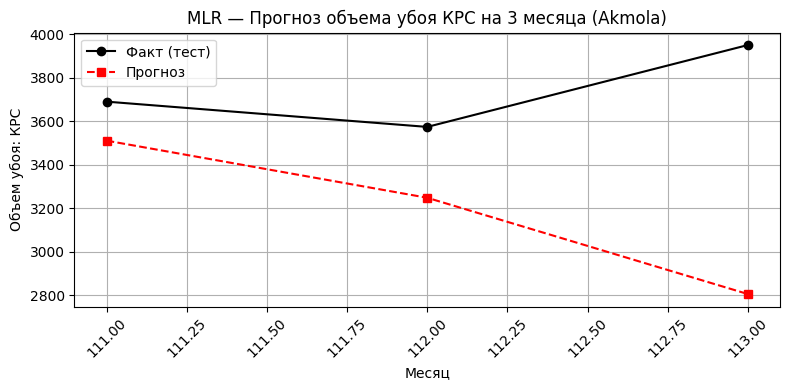

In [138]:
# 1. Define predictors and target
features = ["–û—Å–∞–¥–∫–∏", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"]  # <- adjust based on selected regressors
target = "–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"

# 2. Drop NA (ensure clean data)
df_mlr = df_akmola[features + [target]].dropna().copy()

# 3. Train-test split: last 3 months = test
train_df = df_mlr.iloc[:-3]
test_df = df_mlr.iloc[-3:]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# 4. Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict
y_pred = model.predict(X_test)

# 6. Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100

print("üìä Evaluation Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

# 7. Plot forecast vs actual
plt.figure(figsize=(8, 4))
plt.plot(y_test.index, y_test.values, marker='o', label="–§–∞–∫—Ç (—Ç–µ—Å—Ç)", color='black')
plt.plot(y_test.index, y_pred, marker='s', linestyle='--', label="–ü—Ä–æ–≥–Ω–æ–∑", color='red')
plt.title("MLR ‚Äî –ü—Ä–æ–≥–Ω–æ–∑ –æ–±—ä–µ–º–∞ —É–±–æ—è –ö–†–° –Ω–∞ 3 –º–µ—Å—è—Ü–∞ (–êkmola)")
plt.xlabel("–ú–µ—Å—è—Ü")
plt.ylabel("–û–±—ä–µ–º —É–±–æ—è: –ö–†–°")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [94]:
df_akmola_lag = df_akmola.dropna().copy()
df_akmola_lag

–ü–µ—Ä–∏–æ–¥  –û—Å–∞–¥–∫–∏  –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°  –û–±—ä–µ–º —É–±–æ—è: –ö–†–°  –ö–†–°_t-1  \
4    2015-05    42.8    14.574194        444647.0          3849.70  3923.21   
5    2015-06    16.7    20.763333        440238.0          4074.13  3849.70   
6    2015-07    39.6    19.180645        426134.0          2221.96  4074.13   
7    2015-08    23.5    16.529032        420244.0          2151.76  2221.96   
8    2015-09    14.5    11.496667        412301.0          2728.61  2151.76   
..       ...     ...          ...             ...              ...      ...   
115  2024-08    49.0    17.338710        403674.0          2412.70  2029.47   
116  2024-09    15.0    11.300000        398450.0          2909.66  2412.70   
117  2024-10    15.6     3.832258        392916.0          2608.27  2909.66   
118  2024-11    23.7    -4.343333        387565.0          3649.19  2608.27   
119  2024-12    16.4    -7.638710        379385.0          4253.58  3649.19   

     –ö–†–°_t-2  –ö–†–°_t-3  –ö–†–°_t-4  
4    4287.08  3654.20  4455.35  
5    3923.21  4287.08  3654.20  
6    3849.70  3923.21  4287.08  
7    4074.13  3849.70  3923.21  
8    2221.96  4074.13  3849.70  
..       ...      ...      ...  
115  3951.41  3574.86  3691.05  
116  2029.47  3951.41  3574.86  
117  2412.70  2029.47  3951.41  
118  2909.66  2412.70  2029.47  
119  2608.27  2909.66  2412.70  

[116 rows x 9 columns]

In [99]:
X_vif = add_constant(df_akmola_lag[[i for i in df_akmola_lag.columns if i not in ["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°", "–ü–µ—Ä–∏–æ–¥"]]])

vif_data = pd.DataFrame({
    "Variable": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})
vif_data

Variable        VIF
0           const  52.551223
1          –û—Å–∞–¥–∫–∏   1.327691
2     –¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞   3.454684
3  –ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°   1.206738
4         –ö–†–°_t-1   1.721542
5         –ö–†–°_t-2   1.849385
6         –ö–†–°_t-3   1.919047
7         –ö–†–°_t-4   2.652558

### Multivariate Regression

#### check statistical significance

In [137]:
# df_akmola = df_akmola.dropna().copy()
y = df_akmola["–û–±—ä–µ–º —É–±–æ—è: –ö–†–°"]
X = df_akmola[['–û—Å–∞–¥–∫–∏', '–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞', '–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Print model summary
# print(f"\nüìç –†–µ–≥–∏–æ–Ω: {df_akmola.loc[0]['–†–µ–≥–∏–æ–Ω']}")
print(model.summary())

#     # ‚úÖ Collect results
#     for var in model.params.index:
#         results_list.append({
#             "–†–µ–≥–∏–æ–Ω": region,
#             "–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è": var,
#             "–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç": model.params[var],
#             "p-value": model.pvalues[var],
#             "R-–∫–≤–∞–¥—Ä–∞—Ç": model.rsquared
#         })

# # Convert to DataFrame
# results_df = pd.DataFrame(results_list)

# # Export to Excel
# # results_df.to_excel("krs_linear_regression_results.xlsx", index=False)

# print("\n –ì–æ—Ç–æ–≤–æ! –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω—ã –≤ 'krs_linear_regression_results.xlsx'")


                            OLS Regression Results                            
Dep. Variable:        –û–±—ä–µ–º —É–±–æ—è: –ö–†–°   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     20.47
Date:                Thu, 17 Apr 2025   Prob (F-statistic):           1.68e-10
Time:                        16:20:21   Log-Likelihood:                -864.56
No. Observations:                 108   AIC:                             1737.
Df Residuals:                     104   BIC:                             1748.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3024.8995    301

#### forecast using MLR

In [ ]:
# Forecasting horizon
forecast_horizon = 3

# Container for summary results
results = []

# Loop through each region
for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
    if region == "–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù":
        continue  # ‚õî skip this region
    df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")

    if df_r.shape[0] < forecast_horizon + 12:
        continue  # skip if not enough data

    # Train-test split
    df_train = df_r.iloc[:-forecast_horizon]
    df_test = df_r.iloc[-forecast_horizon:]

    X_train = df_train[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
    y_train = df_train["–ö–†–°"]
    X_test = df_test[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
    y_test = df_test["–ö–†–°"]

    # Fit model
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = (abs((y_test - y_pred) / y_test).mean()) * 100

    results.append({
        "–†–µ–≥–∏–æ–Ω": region,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape,
        "R¬≤ (Train)": model.score(X_train, y_train)
    })

# Save results
results_df = pd.DataFrame(results)
# results_df.to_excel("mlr_forecast_evaluation_by_region.xlsx", index=False)

results_df


In [ ]:
# Calculate and print mean metrics
mean_mape = results_df["MAPE (%)"].mean()
mean_rmse = results_df["RMSE"].mean()
mean_mae = results_df["MAE"].mean()

print(f"–°—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:")
print(f"–°—Ä–µ–¥–Ω–∏–π MAPE: {mean_mape:.2f}%")
print(f"–°—Ä–µ–¥–Ω–∏–π RMSE: {mean_rmse:.2f}")
print(f"–°—Ä–µ–¥–Ω–∏–π MAE: {mean_mae:.2f}")

#### regression for Kazakhstan - –ü–æ–≥–æ–ª–æ–≤—å–µ not statistically significant

In [ ]:
df_kazakhstan = df_model[df_model['–†–µ–≥–∏–æ–Ω'] == '–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù'][["–ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"]].dropna()
y = df_kazakhstan["–ö–†–°"]
X = df_kazakhstan[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°"]]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Print model summary
print("–†–µ–≥–∏–æ–Ω: –†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù")
print(model.summary())

In [ ]:
# from sklearn.linear_model import Ridge

# # Forecasting horizon
# forecast_horizon = 3

# # Container for summary results
# results = []

# # Loop through each region
# for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
#     if region == "–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù":
#         continue  # ‚õî skip this region
#     df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")

#     if df_r.shape[0] < forecast_horizon + 12:
#         continue  # skip if not enough data

#     # Train-test split
#     df_train = df_r.iloc[:-forecast_horizon]
#     df_test = df_r.iloc[-forecast_horizon:]

#     X_train = df_train[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#     y_train = df_train["–ö–†–°"]
#     X_test = df_test[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#     y_test = df_test["–ö–†–°"]

#     # Fit model
#     model = Ridge(alpha=1.0).fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Calculate metrics
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     mae = mean_absolute_error(y_test, y_pred)
#     mape = (abs((y_test - y_pred) / y_test).mean()) * 100

#     results.append({
#         "–†–µ–≥–∏–æ–Ω": region,
#         "RMSE": rmse,
#         "MAE": mae,
#         "MAPE (%)": mape,
#         "R¬≤ (Train)": model.score(X_train, y_train)
#     })

#     # Plot actual vs forecast
#     plt.figure(figsize=(6, 3))
#     plt.plot(df_test["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", label="–§–∞–∫—Ç")
#     plt.plot(df_test["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", label="–ü—Ä–æ–≥–Ω–æ–∑")
#     plt.title(f"{region} ‚Äî –ü—Ä–æ–≥–Ω–æ–∑ –æ–±—ä–µ–º–∞ –ö–†–° –Ω–∞ {forecast_horizon} –º–µ—Å—è—Ü–∞")
#     plt.xlabel("–ú–µ—Å—è—Ü")
#     plt.ylabel("–û–±—ä–µ–º –ö–†–°")
#     plt.legend()
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# # Save results
# results_df = pd.DataFrame(results)
# results_df.to_excel("ridge_forecast_evaluation_by_region.xlsx", index=False)

# print("‚úÖ –ì–æ—Ç–æ–≤–æ! –ú–µ—Ç—Ä–∏–∫–∏ –∏ –≥—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–æ–≥–Ω–æ–∑–∞ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω—ã.")


In [ ]:
# # Forecasting horizon
# forecast_horizon = 12

# # Container for summary results
# results = []

# # Loop through each region
# for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
#     if region == "–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù":
#         continue  # ‚õî skip this region
#     df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")

#     if df_r.shape[0] < forecast_horizon + 12:
#         continue  # skip if not enough data

#     # Train-test split
#     df_train = df_r.iloc[:-forecast_horizon]
#     df_test = df_r.iloc[-forecast_horizon:]

#     X_train = df_train[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#     y_train = df_train["–ö–†–°"]
#     X_test = df_test[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#     y_test = df_test["–ö–†–°"]

#     # Fit model
#     model = LinearRegression().fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Calculate metrics
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     mae = mean_absolute_error(y_test, y_pred)
#     mape = (abs((y_test - y_pred) / y_test).mean()) * 100

#     results.append({
#         "–†–µ–≥–∏–æ–Ω": region,
#         "RMSE": rmse,
#         "MAE": mae,
#         "MAPE (%)": mape,
#         "R¬≤ (Train)": model.score(X_train, y_train)
#     })

#     # üü¶ Optional: Plot actual vs forecast
#     plt.figure(figsize=(8, 4))
#     plt.plot(df_test["–ü–µ—Ä–∏–æ–¥"], y_test, marker="o", label="–§–∞–∫—Ç")
#     plt.plot(df_test["–ü–µ—Ä–∏–æ–¥"], y_pred, marker="s", label="–ü—Ä–æ–≥–Ω–æ–∑")
#     plt.title(f"{region} ‚Äî –ü—Ä–æ–≥–Ω–æ–∑ –æ–±—ä–µ–º–∞ –ö–†–° –Ω–∞ {forecast_horizon} –º–µ—Å—è—Ü–∞")
#     plt.xlabel("–ú–µ—Å—è—Ü")
#     plt.ylabel("–û–±—ä–µ–º –ö–†–°")
#     plt.legend()
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

# # Save results
# results_df = pd.DataFrame(results)
# results_df.to_excel("mlr_forecast_evaluation_by_region_12m.xlsx", index=False)

# print("‚úÖ –ì–æ—Ç–æ–≤–æ! –ú–µ—Ç—Ä–∏–∫–∏ –∏ –≥—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–æ–≥–Ω–æ–∑–∞ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω—ã.")


In [ ]:
# def sliding_window_evaluation(df_r, forecast_horizon=3, window_count=9):
#     metrics = []

#     # Ensure sorted by time
#     df_r = df_r.sort_values("–ü–µ—Ä–∏–æ–¥").reset_index(drop=True)

#     for i in range(window_count):
#         # Define train and test split
#         train_end = i + 12  # require 12+ months for training
#         test_start = train_end
#         test_end = test_start + forecast_horizon

#         if test_end > len(df_r):
#             break

#         df_train = df_r.iloc[:train_end]
#         df_test = df_r.iloc[test_start:test_end]

#         X_train = df_train[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#         y_train = df_train["–ö–†–°"]
#         X_test = df_test[["–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]]
#         y_test = df_test["–ö–†–°"]

#         # Fit model
#         model = LinearRegression().fit(X_train, y_train)
#         y_pred = model.predict(X_test)

#         # Calculate metrics
#         rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#         mae = mean_absolute_error(y_test, y_pred)
#         mape = (np.abs((y_test - y_pred) / y_test).mean()) * 100

#         metrics.append({"RMSE": rmse, "MAE": mae, "MAPE": mape})

#     # Aggregate metrics over all sliding windows
#     return pd.DataFrame(metrics).mean().to_dict()

# results = []

# for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
#     if region == "–†–ï–°–ü–£–ë–õ–ò–ö–ê –ö–ê–ó–ê–•–°–¢–ê–ù":
#         continue  # Optional: exclude a region

#     df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region][["–ü–µ—Ä–∏–æ–¥", "–ö–†–°", "–ü–æ–≥–æ–ª–æ–≤—å–µ: –ö–†–°", "–¢–µ–º–ø–µ—Ä–∞—Ç—É—Ä–∞", "–û—Å–∞–¥–∫–∏"]].dropna()

#     if df_r.shape[0] < 24:
#         continue  # need enough data for multiple windows

#     metrics = sliding_window_evaluation(df_r)

#     results.append({
#         "–†–µ–≥–∏–æ–Ω": region,
#         "Avg RMSE": metrics["RMSE"],
#         "Avg MAE": metrics["MAE"],
#         "Avg MAPE (%)": metrics["MAPE"]
#     })

# # Save result
# results_df = pd.DataFrame(results)
# results_df.to_excel("sliding_window_forecast_evaluation.xlsx", index=False)

# print("‚úÖ –ì–æ—Ç–æ–≤–æ! –°—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ —Å–∫–æ–ª—å–∑—è—â–∏–º –æ–∫–Ω–∞–º —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã.")



### Autoregressive Integrated Moving Average (ARIMA)

In [ ]:
# Container for forecast evaluation results
results = []

# Loop over each region
for region in df_model["–†–µ–≥–∏–æ–Ω"].unique():
    df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")
    y = df_r["–ö–†–°"].reset_index(drop=True)

    if y.isna().sum() > 0 or len(y) < 24:  # Need at least 2 full seasons
        continue

    # Split data
    test_size = 3
    y_train = y[:-test_size]
    y_test = y[-test_size:]

    try:
        # Auto SARIMA model selection
        model = auto_arima(
            y_train,
            seasonal=True,        # Enable SARIMA
            m=12,                 # Season length (12 months)
            stepwise=True,
            suppress_warnings=True,
            error_action="ignore"
        )

        # Forecast
        forecast = model.predict(n_periods=test_size)

        # Evaluation
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        mae = mean_absolute_error(y_test, forecast)
        mape = (np.abs((y_test - forecast) / y_test).mean()) * 100

        results.append({
            "–†–µ–≥–∏–æ–Ω": region,
            "SARIMA order": model.order,
            "Seasonal order": model.seasonal_order,
            "RMSE": rmse,
            "MAE": mae,
            "MAPE (%)": mape
        })

        # Plot actual vs forecast
        plt.figure(figsize=(8, 4))
        plt.plot(y.index, y, color="lightgray", label="–í—Å–µ –¥–∞–Ω–Ω—ã–µ")
        plt.plot(y_test.index, y_test, marker="o", color="black", label="–§–∞–∫—Ç (—Ç–µ—Å—Ç)")
        plt.plot(y_test.index, forecast, marker="s", linestyle="--", color="red", label="–ü—Ä–æ–≥–Ω–æ–∑")
        plt.axvline(len(y_train) - 1, color="gray", linestyle="--", label="–ì—Ä–∞–Ω–∏—Ü–∞ Train/Test")
        plt.title(f"{region} ‚Äî SARIMA{model.order}x{model.seasonal_order} –ü—Ä–æ–≥–Ω–æ–∑ –ö–†–°")
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"‚ö†Ô∏è –û—à–∏–±–∫–∞ –≤ {region}: {e}")

# Save results to Excel
results_df = pd.DataFrame(results)
results_df
# results_df.to_excel("sarima_forecast_evaluation_all_regions.xlsx", index=False)


In [ ]:
# Calculate and print mean metrics
mean_mape = results_df["MAPE (%)"].mean()
mean_rmse = results_df["RMSE"].mean()
mean_mae = results_df["MAE"].mean()

print(f"–°—Ä–µ–¥–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º:")
print(f"–°—Ä–µ–¥–Ω–∏–π MAPE: {mean_mape:.2f}%")
print(f"–°—Ä–µ–¥–Ω–∏–π RMSE: {mean_rmse:.2f}")
print(f"–°—Ä–µ–¥–Ω–∏–π MAE: {mean_mae:.2f}")

In [ ]:
# Step 1: Select one region's time series
region = "–ê–ö–ú–û–õ–ò–ù–°–ö–ê–Ø –û–ë–õ–ê–°–¢–¨"
df_r = df_model[df_model["–†–µ–≥–∏–æ–Ω"] == region].sort_values("–ü–µ—Ä–∏–æ–¥")
y = df_r["–ö–†–°"].reset_index(drop=True)

# Step 2: Check stationarity (ADF test)
result = adfuller(y)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("‚ùå Non-stationary ‚Äî differencing needed.")
else:
    print("‚úÖ Stationary")



In [ ]:
# Step 3: (If needed) difference the series
y_diff = y.diff().dropna()

In [ ]:
# Step 4: Fit ARIMA model (p,d,q) ‚Äî try (1,1,1) to start
model = ARIMA(y, order=(1,1,1))  # (p=1, d=1, q=1) ‚Äî adjust based on AIC later
model_fit = model.fit()

# Step 5: Forecast next 3 months
forecast = model_fit.forecast(steps=3)
print("üîÆ Forecast for next 3 months:")
print(forecast)

# Step 6: Plot
plt.figure(figsize=(10,5))
plt.plot(y, label="Actual")
plt.plot(np.arange(len(y), len(y)+3), forecast, label="Forecast", marker='o')
plt.title(f"ARIMA Forecast ‚Äî {region}")
plt.legend()
plt.grid(True)
plt.show()

strength of correlation:
https://link.springer.com/article/10.1057/jt.2009.5#
https://resources.nu.edu/statsresources/correlation